<a href="https://colab.research.google.com/github/tasanyphy01773/DS_and_ML/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
dataSet1 = pd.read_csv('/content/Data_Set.csv', header =2)
dataSet2 = dataSet1.drop(0, axis = 0)
dataSet3 = dataSet2.reset_index(drop = True)
dataSet4 = dataSet3.rename(columns = {'Temperature':'Temp'})
dataSet4 = dataSet4.rename(columns = {'No. Occupants': 'Occupants'})
dataSet5 = dataSet4.drop('Occupants', axis = 1)

In [ ]:
dataSet1.head()

,Time,E_Plug,E_Heat,Price,Temperature,No. Occupants
0,1,24.0,28,10,-15,12
1,2,17.0,32,12,-17,12
2,3,16.0,34,11,-19,12
3,3,16.0,34,11,-19,12
4,4,16.0,33,12,-18,12


In [ ]:
dataSet5.head()

,Time,E_Plug,E_Heat,Price,Temp
0,2,17.0,32,12,-17
1,3,16.0,34,11,-19
2,3,16.0,34,11,-19
3,4,16.0,33,12,-18
4,5,16.0,30,10,-14


In [ ]:
#spot location
min_item = dataSet5['E_Heat'].min()
max_item = dataSet5['E_Heat'].max()

dataSet5['E_Heat'][dataSet5['E_Heat'] == min_item]
dataSet6 = dataSet5.replace(min_item, 18) #replace data with another data

In [ ]:
dataSet6.head()

,Time,E_Plug,E_Heat,Price,Temp
0,2,17.0,32,12,-17
1,3,16.0,34,11,-19
2,3,16.0,34,11,-19
3,4,16.0,33,12,-18
4,5,16.0,30,10,-14


In [ ]:
dataSet6.cov()

,Time,E_Plug,E_Heat,Temp
Time,48.166667,91.314229,-3.463768,7.956522
E_Plug,91.314229,463.513834,21.875494,0.272727
E_Heat,-3.463768,21.875494,51.449275,-61.565217
Temp,7.956522,0.272727,-61.565217,98.260870


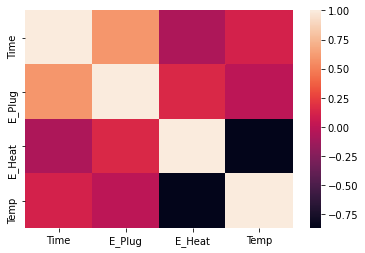

In [ ]:
import seaborn as sn

sn.heatmap(dataSet6.corr())
plt.show()

In [ ]:
dataSet6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    24 non-null     int64  
 1   E_Plug  23 non-null     float64
 2   E_Heat  24 non-null     int64  
 3   Price   24 non-null     object 
 4   Temp    24 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.1+ KB


In [ ]:
dataSet6.describe()

,Time,E_Plug,E_Heat,Temp
count,24.000000,23.000000,24.000000,24.000000
mean,12.583333,31.173913,26.833333,-9.500000
std,6.940221,21.529371,7.172815,9.912662
min,2.000000,16.000000,13.000000,-22.000000
25%,6.750000,18.000000,19.750000,-17.250000
50%,12.500000,27.000000,29.500000,-13.000000
75%,18.250000,34.500000,32.250000,0.000000
max,24.000000,120.000000,36.000000,18.000000


In [ ]:
type(dataSet6)

pandas.core.frame.DataFrame

In [ ]:
#cleaning data
dataSet6.replace('!', np.NaN, inplace = True)
dataSet6 = dataSet6.apply(pd.to_numeric)

#fillna method 
dataSet7 = dataSet6.fillna(method = 'ffill') 
#use bfill to fill data with the next observation 

In [ ]:
dataSet7.head()

,Time,E_Plug,E_Heat,Price,Temp
0,2,17.0,32,12.0,-17
1,3,16.0,34,11.0,-19
2,3,16.0,34,11.0,-19
3,4,16.0,33,12.0,-18
4,5,16.0,30,10.0,-14


In [ ]:
#scikit-learn 

from sklearn.impute import SimpleImputer
m_var = SimpleImputer(missing_values = np.nan, strategy = 'median') #mean
m_var.fit(dataSet6)
dataSet10 = m_var.transform(dataSet6)

In [ ]:
type(dataSet10)

numpy.ndarray

In [ ]:
dataSet10 = pd.DataFrame(dataSet10, columns=['Time', 'E_Plug', 'E_Heat', 'Price',
                                              'Temp'])
dataSet10.head()

,Time,E_Plug,E_Heat,Price,Temp
0,2.0,17.0,32.0,12.0,-17.0
1,3.0,16.0,34.0,11.0,-19.0
2,3.0,16.0,34.0,11.0,-19.0
3,4.0,16.0,33.0,12.0,-18.0
4,5.0,16.0,30.0,10.0,-14.0


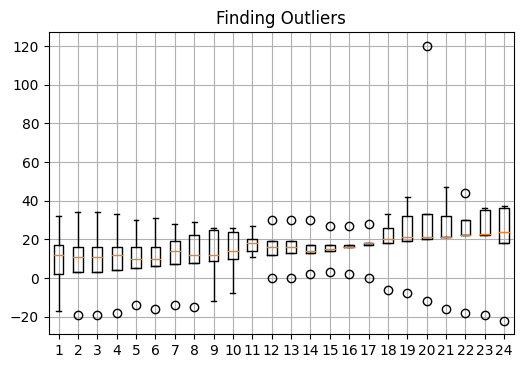

In [ ]:
""" 
Outliers detection
"""
# labels = ['Time', 'E_Plug', 'E_heat', 'Price', 'Temp']
plt.figure(dpi=100)
plt.boxplot(dataSet7)
plt.title("Finding Outliers")
# plt.xticks([1,2,3,4,5], labels)
plt.grid()

In [ ]:
q1 = dataSet7['E_Plug'].quantile(0.25)
q3 = dataSet7['E_Plug'].quantile(0.75)


IQR = q3 - q1

#mild outlier 
lower_bound = q1-(1.5*IQR)
upper_bound = q3+(1.5*IQR)

print(f"Mild Outliers are {lower_bound} to {upper_bound}")

#extreme outliers 

lower_bound_ext = q1-(3*IQR)
upper_bound_ext = q3+(3*IQR)

print(f"Mild Outliers are {lower_bound_ext} to {upper_bound_ext}")

Mild Outliers are -4.375 to 56.625
Mild Outliers are -27.25 to 79.5


In [ ]:
#concatenation
new_col = pd.read_csv('Data_New.csv')

dataSet10 = pd.concat([dataSet7, new_col], axis = 1)
dataSet10.head()

,Time,E_Plug,E_Heat,Price,Temp,P/OffP
0,2,17.0,32,12.0,-17,OffPeak
1,3,16.0,34,11.0,-19,OffPeak
2,3,16.0,34,11.0,-19,OffPeak
3,4,16.0,33,12.0,-18,OffPeak
4,5,16.0,30,10.0,-14,OffPeak


In [ ]:
#dummy coding 
dataSet10.info()

dataSet11 = pd.get_dummies(dataSet10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     24 non-null     int64  
 1   E_Plug   24 non-null     float64
 2   E_Heat   24 non-null     int64  
 3   Price    24 non-null     float64
 4   Temp     24 non-null     int64  
 5   P/OffP   24 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.2+ KB


In [ ]:
dataSet11.head()

,Time,E_Plug,E_Heat,Price,Temp,P/OffP _OffPeak,P/OffP _Peak
0,2,17.0,32,12.0,-17,1,0
1,3,16.0,34,11.0,-19,1,0
2,3,16.0,34,11.0,-19,1,0
3,4,16.0,33,12.0,-18,1,0
4,5,16.0,30,10.0,-14,1,0


In [ ]:
"""
Normalization
"""
from sklearn.preprocessing import minmax_scale, normalize 

#can be used any of this method for normalization
dataSet12 = minmax_scale(dataSet11, feature_range=(0,1))
dataSet13 = normalize(dataSet11, norm = 'l2', axis = 0)

dataSet13 = pd.DataFrame(dataSet13, columns =['Time', 'E_Plug', 'E_Heat', 'Price',
                                              'Temp', 'OffPeak', 'Peak'])

dataSet13.head()

# axis0 or 1, optional (1 by default)
# axis used to normalize the data along. 
# If 1, independently normalize each sample, otherwise 
# (if 0) normalize each feature.


,Time,E_Plug,E_Heat,Price,Temp,OffPeak,Peak
0,0.028548,0.092952,0.235498,0.150899,-0.255531,0.25,0.0
1,0.042822,0.087484,0.250217,0.138324,-0.285593,0.25,0.0
2,0.042822,0.087484,0.250217,0.138324,-0.285593,0.25,0.0
3,0.057096,0.087484,0.242857,0.150899,-0.270562,0.25,0.0
4,0.071370,0.087484,0.220779,0.125749,-0.210437,0.25,0.0
